In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# Loads the data from UCI Machine Learning Repo into a pandas DataFrame
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
# Names the columns 
mushrooms.columns = columns
# Replace "?" (represents missing values on UCI Machine Learning Repo) witn np.NaN
mushrooms.replace('?', np.NaN, inplace = True)

In [17]:
# Gets a dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)

# Gets the predictor features 
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms_no_stalk_root["class"].values

le = LabelEncoder()
# Encodes the target
y = le.fit_transform(y)

# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical)
#std_scaler = StandardScaler()
# Standardizes training data
#X_train = std_scaler.fit_transform(X_train)
# and testing data with training data's mean and stdv
#X_test = std_scaler.transform(X_test)

In [4]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9983586376692655

In [5]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [6]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

This grid search is [very slow](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow) for such large datasets, but still acceptable.

In [8]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 3607.864349126816

In [9]:
svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(X_train, y_train)
svc.score(X_test, y_test) 

1.0

Using only the most important features learned by random forest.

In [10]:
X = pd.get_dummies(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type']]).values
y = mushrooms["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(X_train, y_train)
svc.score(X_test, y_test) 

1.0

In [11]:
pipe = Pipeline([('clf', SVC(random_state = 0))]) 

In [12]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

This grid search is [very slow](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow) for such large datasets. This may be better to run after PCA!

In [13]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators#
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 896.680046081543

In [14]:
svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(X_train, y_train)
svc.score(X_test, y_test) 

1.0

# TODO: Use PCA and interpret SVM for two or maybe 3 dimensions

In [3]:
# Gets a dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)

# Gets the predictor features 
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms_no_stalk_root["class"].values

le = LabelEncoder()
# Encodes the target
y = le.fit_transform(y)

# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

svc = SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(X_train, y_train)
svc.score(X_test, y_test) 

0.901928600738613

In [ ]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

import time
start = time.time()
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
gs = gs.fit(X_train, y_train)
print(gs.best_score_, gs.best_params_, gs.best_estimator_)
print(time.time() - start) 

# Learning and validation curves for decision tree. It is not overfitting.

In [22]:
# Gets a dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)

# Gets the predictor features 
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
# And encodes them (they are all categorical)
X = pd.get_dummies(X).values
# Gets the target feature (binary)
y = mushrooms_no_stalk_root["class"].values

le = LabelEncoder()
# Encodes the target
y = le.fit_transform(y)

# Splits between training and testing, stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical)
#std_scaler = StandardScaler()
# Standardizes training data
#X_train = std_scaler.fit_transform(X_train)
# and testing data with training data's mean and stdv
#X_test = std_scaler.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
# Fits the training data to a Decision Tree
tree.fit(X_train, y_train)
# Evaluates the model using the testing data
tree.score(X_test, y_test)

1.0

PML pag 197.

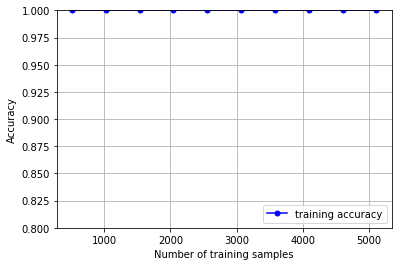

In [28]:
from sklearn.model_selection import learning_curve 
pipe_lr = Pipeline([("tree", DecisionTreeClassifier(random_state = 0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')  
plt.fill_between(train_sizes,train_mean + train_std,
                 train_mean - train_std,alpha=0.15, color='blue')
#plt.plot(train_sizes, test_mean, color='green', linestyle='--',
#         marker='s', markersize=5, label='validation accuracy')
#plt.fill_between(train_sizes, test_mean + test_std,
#                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

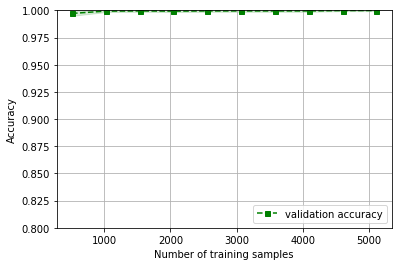

In [29]:
plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

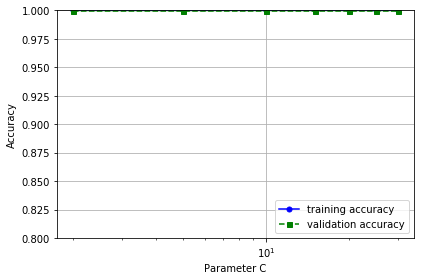

In [36]:
from sklearn.model_selection import validation_curve


param_range = [2, 5, 10, 15, 20, 25, 30]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name="tree__min_samples_split", 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

# Checking something...

In [3]:
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
# Names the columns 
mushrooms.columns = columns
# Replace "?" (represents missing values on UCI Machine Learning Repo) witn np.NaN
mushrooms.replace('?', np.NaN, inplace = True)

In [4]:
mushrooms.shape

(8123, 23)

In [6]:
mushrooms.drop_duplicates().shape

(8123, 23)